<i>DISCLAIMER:<br>
Bellow code is only for informative purpose, i renounce any responsibility regarding this code and trained model causing loss of money during trading on real market.</i>

# Stock price prediction : NVDA

This page does following:

- load libraries and load stock data as dataframe
- display chart with close price
- add indicators to loaded dataframe
- filter out formations and get its windows
- Export data to csv file

<b>Trading strategy</b><br>
Trading chart: Daily<br>
Trade type: LONG<br>
Stock: NVDA<br>
Entry price: Open price of current week<br>
Exit price: Model predicts Highest high price of following month (4 weeks period)

<b>Trading Data</b><br>
We are loading weekly data from yahoo finance. We are preprocessing dataset in following order - 24 candle formation (representing 24 weeks) + 1 monthly candle as label (following 4 weeks period). Bellow code will preprocess data in such order, 25th candle in window is always a monthly candle.

<b>**monthly candle is not calendar month, it is 4 weeks period that is followed by our 24 candle formation</b>

Trading method is following:
- We are trading upper trend

<b>Traded formation</b><br>



We are getting windows from stock dataset, each window has 25 rows (24 + 1 candles), 24 rows (formation) + 1 row (label). 



___________________

<b>Import libraries</b>

In [26]:
import yfinance as yf
import talib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

<b>load data</b>

In [27]:
stock = yf.download('nvda', 
                      start='1980-01-01', 
                      end='2022-08-04', 
                      interval="1wk",
                      progress=False,
)
stock.head(12)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-18,0.437500,0.488281,0.388021,0.410156,0.376630,271468800.0
1999-01-25,0.442708,0.467448,0.395833,0.395833,0.363477,156960000.0
1999-02-01,0.395833,0.416667,0.360677,0.412760,0.379021,81268800.0
1999-02-08,0.415365,0.437500,0.372396,0.434896,0.399348,63124800.0
1999-02-15,0.442708,0.460938,0.393229,0.434896,0.399348,42480000.0
1999-02-22,0.442708,0.546875,0.414063,0.457031,0.419673,127785600.0
1999-03-01,0.468750,0.479167,0.411458,0.438802,0.402934,34492800.0
1999-03-08,0.427083,0.466146,0.416667,0.424479,0.389782,59947200.0
1999-03-15,0.434896,0.450521,0.420573,0.437500,0.401739,39096000.0


<b>Display chart</b>

<AxesSubplot:xlabel='Date'>

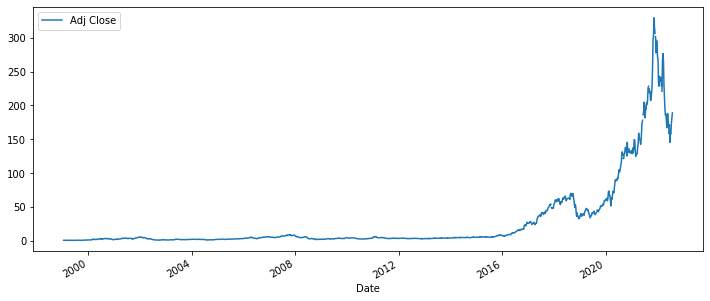

In [28]:
stock['Adj Close'].plot(legend=True,figsize=(12,5))

<b>Remove nan</b>

In [29]:
print(len(stock))
stock = stock.dropna(axis=0)
print(len(stock))

1272
1229


<b>Add indicators</b>

We are adding exponential moving average for a model to get additional data for training

In [30]:
stock['EMA6'] = talib.EMA(stock['Close'], timeperiod=6)
stock['EMA12'] = talib.EMA(stock['Close'], timeperiod=12)
stock['EMA24'] = talib.EMA(stock['Close'], timeperiod=24)
stock.head(12)

,Open,High,Low,Close,Adj Close,Volume,EMA6,EMA12,EMA24
Date,,,,,,,,,
1999-01-18,0.437500,0.488281,0.388021,0.410156,0.376630,271468800.0,NaN,NaN,NaN
1999-01-25,0.442708,0.467448,0.395833,0.395833,0.363477,156960000.0,NaN,NaN,NaN
1999-02-01,0.395833,0.416667,0.360677,0.412760,0.379021,81268800.0,NaN,NaN,NaN
1999-02-08,0.415365,0.437500,0.372396,0.434896,0.399348,63124800.0,NaN,NaN,NaN
1999-02-15,0.442708,0.460938,0.393229,0.434896,0.399348,42480000.0,NaN,NaN,NaN
1999-02-22,0.442708,0.546875,0.414063,0.457031,0.419673,127785600.0,0.424262,NaN,NaN
1999-03-01,0.468750,0.479167,0.411458,0.438802,0.402934,34492800.0,0.428416,NaN,NaN
1999-03-08,0.427083,0.466146,0.416667,0.424479,0.389782,59947200.0,0.427291,NaN,NaN
1999-03-15,0.434896,0.450521,0.420573,0.437500,0.401739,39096000.0,0.430208,NaN,NaN


Remove not needed colls

In [31]:
try:
    stock = stock.drop(labels=['Adj Close','Volume'],axis=1)
except:
    pass
stock = stock.reset_index()
stock.head(6)

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
0,1999-01-18,0.437500,0.488281,0.388021,0.410156,NaN,NaN,NaN
1,1999-01-25,0.442708,0.467448,0.395833,0.395833,NaN,NaN,NaN
2,1999-02-01,0.395833,0.416667,0.360677,0.412760,NaN,NaN,NaN
3,1999-02-08,0.415365,0.437500,0.372396,0.434896,NaN,NaN,NaN
4,1999-02-15,0.442708,0.460938,0.393229,0.434896,NaN,NaN,NaN
5,1999-02-22,0.442708,0.546875,0.414063,0.457031,0.424262,NaN,NaN


In [32]:
stock['Date'] = pd.to_datetime(stock['Date'], format="%Y-%m-%d") 
stock.head(6)

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
0,1999-01-18,0.437500,0.488281,0.388021,0.410156,NaN,NaN,NaN
1,1999-01-25,0.442708,0.467448,0.395833,0.395833,NaN,NaN,NaN
2,1999-02-01,0.395833,0.416667,0.360677,0.412760,NaN,NaN,NaN
3,1999-02-08,0.415365,0.437500,0.372396,0.434896,NaN,NaN,NaN
4,1999-02-15,0.442708,0.460938,0.393229,0.434896,NaN,NaN,NaN
5,1999-02-22,0.442708,0.546875,0.414063,0.457031,0.424262,NaN,NaN


Bellow code will sort out data to windows of 25 rows

24 rows representing 24 weeks 1 row represents monthly candle max/min/open/close (that candle will be used as label in model training)

In [52]:
from datetime import datetime


#stock = stock.reset_index()
stock
#get week day
#stock.iloc[0,0].weekday()
validated = False
week_validation = 0
ndweek_validation = 0
c = 0

final_df_w = pd.DataFrame()

for row in range(len(stock)):

        if row+24+4<len(stock):      

            temp_df = pd.DataFrame()
            temp_df = stock.iloc[row:row+24,:].copy()

            validated = False
            ndweek_validation = 0

            temp_df2 = pd.DataFrame()
            temp_df2 = stock.iloc[row+24:row+24+4,:].copy()
            maxv = np.max(temp_df2.iloc[:,1:4].to_numpy())
            minv = np.min(temp_df2.iloc[:,1:4].to_numpy())
            if maxv == np.nan:
                print(temp_df2.iloc[:,1:4])
                break
            openv = temp_df2.iloc[0,1]
            closev = temp_df2.iloc[3,4]

        #     print("openv: ",openv)
        #     print("close: ",closev)
        #     print("maxv: ", maxv)
        #     print("minv: ", minv)

            dicti = {'Open':[openv],
                    'High':[maxv],
                    'Low':[minv],
                    'Close':[closev],
                    'Date':"Month"}

            temp_df3 = pd.DataFrame(dicti)
            final_df_w = pd.concat([final_df_w,temp_df],axis=0)
            final_df_w = pd.concat([final_df_w,temp_df3],axis=0)
    


print("DONE")      

DONE


Data check

In [53]:
final_df_w.tail(25)

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
1200,2022-01-17 00:00:00,262.600006,266.380005,232.630005,233.740005,268.501034,271.773393,255.510544
1201,2022-01-24 00:00:00,223.300003,240.570007,208.880005,228.399994,257.043594,265.100563,253.341700
1202,2022-01-31 00:00:00,231.820007,258.170013,230.520004,243.190002,253.085425,261.729707,252.529564
1203,2022-02-07 00:00:00,243.720001,269.250000,237.729996,239.490005,249.201020,258.308215,251.486399
1204,2022-02-14 00:00:00,239.339996,265.820007,231.000000,236.419998,245.549299,254.940797,250.281087
1205,2022-02-21 00:00:00,230.350006,242.169998,208.899994,241.570007,244.412359,252.883752,249.584201
1206,2022-02-28 00:00:00,239.919998,246.649994,224.820007,229.360001,240.111685,249.264714,247.966265
1207,2022-03-07 00:00:00,228.169998,232.199997,206.500000,221.000000,234.651204,244.916296,245.808964
1208,2022-03-14 00:00:00,218.690002,265.690002,211.589996,264.529999,243.188002,247.933789,247.306646
1209,2022-03-21 00:00:00,265.070007,283.579987,255.750000,276.920013,252.825720,252.393208,249.675716


In [38]:
windowed_df = final_df_w.copy()
print(len(windowed_df)/25)
#windowed_df = windowed_df.set_index('Date')
windowed_df.tail(12)

1201.0


,Date,Open,High,Low,Close,EMA6,EMA12,EMA24
1213,2022-04-18 00:00:00,212.000000,226.699997,195.000000,195.149994,226.468001,237.440834,242.418401
1214,2022-04-25 00:00:00,192.020004,201.279999,182.899994,185.470001,214.754287,229.445321,237.862529
1215,2022-05-02 00:00:00,185.410004,204.000000,179.899994,186.750000,206.753062,222.876810,233.773527
1216,2022-05-09 00:00:00,180.339996,182.550003,155.669998,177.059998,198.269329,215.828070,229.236444
1217,2022-05-16 00:00:00,175.089996,183.710007,157.550003,166.940002,189.318093,208.306829,224.252729
1218,2022-05-23 00:00:00,162.740005,188.809998,157.800003,188.110001,188.972924,205.199624,221.361311
1219,2022-05-30 00:00:00,189.800003,196.190002,181.220001,187.199997,188.466373,202.430451,218.628406
1220,2022-06-06 00:00:00,191.389999,193.369995,168.690002,169.740005,183.115982,197.401152,214.717334
1221,2022-06-13 00:00:00,160.000000,168.679993,153.279999,158.800003,176.168560,191.462513,210.243947
1222,2022-06-20 00:00:00,164.750000,171.399994,158.529999,171.259995,174.766113,188.354434,207.125231


Bellow code will select only windows with 24 rows each, that represents formation that is intended to trade. If conditions, representing the formation are True, window is appended to new dataframe train_df. That df is exported as csv file.

In [54]:
temp_df = pd.DataFrame()
final_df = pd.DataFrame()
flag = True
trades = 0
counter = 0
for row in range(24,len(windowed_df)):
    if windowed_df.iloc[row,0] == "Month":

        #maxv = np.max(windowed_df.iloc[row-5:row,1:5].to_numpy())
        #print(windowed_df.iloc[row-5:row,1:5])
        #print(maxv)

        #Debugging block
#         print("Last Close: ",windowed_df.iloc[row-1,4])
#         print("First Open: ",windowed_df.iloc[row-5,1])
#         print("Last Open: ",windowed_df.iloc[row-1,1])
#         print("Last EMA 6: ",windowed_df.iloc[row-1,5])
#         print("Last High: ",windowed_df.iloc[row-1,2])
#         print("Weekly high: ",windowed_df.iloc[row,2])
#         temp_df = windowed_df.iloc[row-5:row+1,:]
#         break
    
        #Trading Condition
        if (#Last close is lower than EMA6
            #windowed_df.iloc[row-1,4] < windowed_df.iloc[row-1,5] 
            #Last EMA6 is lower than EMA12
            #and (windowed_df.iloc[row-1,5] < windowed_df.iloc[row-1,6]) 
            #and 
            flag == True): 
                      
            #Validation
            if counter == 0:
                
                counter += 1
                print("Last Close: ",windowed_df.iloc[row-1,4])
                print("Last Open: ",windowed_df.iloc[row-1,1])
                print("Last High: ",windowed_df.iloc[row-1,2])
                print("First Open: ",windowed_df.iloc[row-24,1])
                print("Following Week high: ",windowed_df.iloc[row,2])
                print("Last EMA 6: ",windowed_df.iloc[row-1,5])
                print("Last EMA 12: ",windowed_df.iloc[row-1,6])
                
            temp_df = windowed_df.iloc[row-24:row+1,:]           
            
            trades += 1
                        
            temp_df = windowed_df.iloc[row-24:row+1,:]

            temp_df['trades'] = int(trades)

            final_df = pd.concat([final_df,temp_df],axis=0)
             
#debugging
#temp_df.tail(7)
final_df.head(27)

Last Close:  0.40494799613952637
Last Open:  0.3684900104999542
Last High:  0.40494799613952637
First Open:  0.4375
Following Week high:  0.48177099227905273
Last EMA 6:  0.3719491555899186
Last EMA 12:  0.37640457234317476


,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
0,1999-01-18 00:00:00,0.437500,0.488281,0.388021,0.410156,NaN,NaN,NaN,1
1,1999-01-25 00:00:00,0.442708,0.467448,0.395833,0.395833,NaN,NaN,NaN,1
2,1999-02-01 00:00:00,0.395833,0.416667,0.360677,0.412760,NaN,NaN,NaN,1
3,1999-02-08 00:00:00,0.415365,0.437500,0.372396,0.434896,NaN,NaN,NaN,1
4,1999-02-15 00:00:00,0.442708,0.460938,0.393229,0.434896,NaN,NaN,NaN,1
5,1999-02-22 00:00:00,0.442708,0.546875,0.414063,0.457031,0.424262,NaN,NaN,1
6,1999-03-01 00:00:00,0.468750,0.479167,0.411458,0.438802,0.428416,NaN,NaN,1
7,1999-03-08 00:00:00,0.427083,0.466146,0.416667,0.424479,0.427291,NaN,NaN,1
8,1999-03-15 00:00:00,0.434896,0.450521,0.420573,0.437500,0.430208,NaN,NaN,1
9,1999-03-22 00:00:00,0.446615,0.447917,0.380208,0.436198,0.431920,NaN,NaN,1


In [55]:
final_df.tail()

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
1220,2022-06-06 00:00:00,191.389999,193.369995,168.690002,169.740005,183.115982,197.401152,214.717334,1201
1221,2022-06-13 00:00:00,160.000000,168.679993,153.279999,158.800003,176.168560,191.462513,210.243947,1201
1222,2022-06-20 00:00:00,164.750000,171.399994,158.529999,171.259995,174.766113,188.354434,207.125231,1201
1223,2022-06-27 00:00:00,173.119995,173.300003,143.919998,145.229996,166.327222,181.719905,202.173612,1201
0,Month,141.750000,182.440002,140.550003,181.630005,NaN,NaN,NaN,1201


In [56]:
final_df = final_df.set_index('Date')
final_df.tail()

,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
Date,,,,,,,,
2022-06-06 00:00:00,191.389999,193.369995,168.690002,169.740005,183.115982,197.401152,214.717334,1201
2022-06-13 00:00:00,160.000000,168.679993,153.279999,158.800003,176.168560,191.462513,210.243947,1201
2022-06-20 00:00:00,164.750000,171.399994,158.529999,171.259995,174.766113,188.354434,207.125231,1201
2022-06-27 00:00:00,173.119995,173.300003,143.919998,145.229996,166.327222,181.719905,202.173612,1201
Month,141.750000,182.440002,140.550003,181.630005,NaN,NaN,NaN,1201


<b>Save final data in csv format</b>

This csv file is used by following list to trade our model

In [57]:
print("final_df shape: ",final_df.shape)
final_df.to_csv('nvda_stock_raw.csv')

final_df shape:  (30025, 8)


<b>Save raw stock data in csv format</b>

This is done only for validation purpose of final trades

In [58]:
print("initial stock shape: ",stock.shape)
stock.to_csv('nvda_stock_raw_initial_df.csv')

initial stock shape:  (1229, 8)


In [59]:
trades

1201

In [60]:
ttl = final_df.shape[0]
main_ratio = 0.10
#split_ratio = 0.4

trades_ttl = np.max(final_df['trades'])
print(trades_ttl)
print(ttl)
#def GetDataReverted():
trades_training = np.round(trades * main_ratio)
print(trades_training)

min_bound = int(trades-trades_training)
max_bound = trades_ttl
print("min bound: ",min_bound)
print("max bound: ",max_bound)

training_part = final_df[final_df['trades']>=min_bound].copy()
# counter = 0
# training_part['trades'] = training_part['trades'].apply(lambda x: x if counter <= 25 else counter+1)
# training_part

# counter = 1
# training_part = training_part.reset_index()

# #trade numbers
# for i in range(training_part.shape[0]):

#     if training_part.iloc[i,0] == 'Month':
#         training_part.iloc[i,8] = counter
#         counter = counter + 1
#     else:
#         training_part.iloc[i,8] = counter
# training_part = training_part.set_index('Date')       
# training_part
        
# trades_training = np.max(training_part['trades'])
# min_bound_training = round(trades_training*split_ratio)
# max_bound_training = 0
# print("min bound training: ",min_bound_training)
# print("max bound training: ",max_bound_training)
# print("TTL TRAIN DATASET: ",(-min_bound_training+trades_training))

# # training_part_final = training_part[training_part['trades']>=min_bound_training].copy()
# # testing_part_final = training_part[training_part['trades']<min_bound_training].copy()
# # final_df_revised = pd.concat([training_part_final,testing_part_final], axis=0)
# # #testing_part_final
# # training_part_final
# # final_df_revised.head(26)
# # testing_part_final
# training_part
# final_df_revised = final_df_revised.copy()

1201
30025
120.0
min bound:  1081
max bound:  1201


In [61]:
# final_df_revised = final_df_revised.reset_index()
training_part.tail(2)

,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
Date,,,,,,,,
2022-06-27 00:00:00,173.119995,173.300003,143.919998,145.229996,166.327222,181.719905,202.173612,1201
Month,141.750000,182.440002,140.550003,181.630005,NaN,NaN,NaN,1201


In [62]:
training_part.to_csv('nvda_stock_raw_revised.csv')

In [63]:
training_part.tail(25)

,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
Date,,,,,,,,
2022-01-17 00:00:00,262.600006,266.380005,232.630005,233.740005,268.501034,271.773393,255.510544,1201
2022-01-24 00:00:00,223.300003,240.570007,208.880005,228.399994,257.043594,265.100563,253.341700,1201
2022-01-31 00:00:00,231.820007,258.170013,230.520004,243.190002,253.085425,261.729707,252.529564,1201
2022-02-07 00:00:00,243.720001,269.250000,237.729996,239.490005,249.201020,258.308215,251.486399,1201
2022-02-14 00:00:00,239.339996,265.820007,231.000000,236.419998,245.549299,254.940797,250.281087,1201
2022-02-21 00:00:00,230.350006,242.169998,208.899994,241.570007,244.412359,252.883752,249.584201,1201
2022-02-28 00:00:00,239.919998,246.649994,224.820007,229.360001,240.111685,249.264714,247.966265,1201
2022-03-07 00:00:00,228.169998,232.199997,206.500000,221.000000,234.651204,244.916296,245.808964,1201
2022-03-14 00:00:00,218.690002,265.690002,211.589996,264.529999,243.188002,247.933789,247.306646,1201


In [22]:
training_part.tail(25) 

,Date,Open,High,Low,Close,EMA6,EMA12,EMA24,trades
1200,2022-01-17 00:00:00,262.600006,266.380005,232.630005,233.740005,268.501034,271.773393,255.510544,1201
1201,2022-01-24 00:00:00,223.300003,240.570007,208.880005,228.399994,257.043594,265.100563,253.341700,1201
1202,2022-01-31 00:00:00,231.820007,258.170013,230.520004,243.190002,253.085425,261.729707,252.529564,1201
1203,2022-02-07 00:00:00,243.720001,269.250000,237.729996,239.490005,249.201020,258.308215,251.486399,1201
1204,2022-02-14 00:00:00,239.339996,265.820007,231.000000,236.419998,245.549299,254.940797,250.281087,1201
1205,2022-02-21 00:00:00,230.350006,242.169998,208.899994,241.570007,244.412359,252.883752,249.584201,1201
1206,2022-02-28 00:00:00,239.919998,246.649994,224.820007,229.360001,240.111685,249.264714,247.966265,1201
1207,2022-03-07 00:00:00,228.169998,232.199997,206.500000,221.000000,234.651204,244.916296,245.808964,1201
1208,2022-03-14 00:00:00,218.690002,265.690002,211.589996,264.529999,243.188002,247.933789,247.306646,1201
1209,2022-03-21 00:00:00,265.070007,283.579987,255.750000,276.920013,252.825720,252.393208,249.675716,1201
